In [ ]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import to_graphviz
from xgboost import plot_tree
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.layers import LSTM



In [ ]:
uploaded=files.upload()

Saving DATA.zip to DATA.zip


In [ ]:
synt_data=pd.read_csv('DATA.zip')
synt_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
synt_data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
synt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
synt_data.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
synt_data.shape

(6362620, 11)

In [ ]:
for col in synt_data.columns:
  print(f' synt_data columns {col} unique')
  print(synt_data[col].value_counts())
  print('*********************************************************************')

 synt_data columns step unique
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
*********************************************************************
 synt_data columns type unique
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
*********************************************************************
 synt_data columns amount unique
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64
*********************************************************************
 synt_data columns nameOrig unique
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879  

In [ ]:
numerical=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']

In [ ]:
le=LabelEncoder()
synt_data['type']=le.fit_transform(synt_data['type'])
synt_data['nameOrig']=le.fit_transform(synt_data['nameOrig'])
synt_data['nameDest']=le.fit_transform(synt_data['nameDest'])

In [ ]:
scaler=StandardScaler()
for cols in numerical:
  synt_data[cols]=scaler.fit_transform(synt_data[[cols]])

In [ ]:
synt_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703042,3,-0.281560,757869,-0.229810,-0.237622,1662094,-0.323814,-0.333411,0,-0.001586
1,-1.703042,3,-0.294767,2188998,-0.281359,-0.285812,1733924,-0.323814,-0.333411,0,-0.001586
2,-1.703042,4,-0.297555,1002156,-0.288654,-0.292442,439685,-0.323814,-0.333411,1,-0.001586
3,-1.703042,1,-0.297555,5828262,-0.288654,-0.292442,391696,-0.317582,-0.333411,1,-0.001586
4,-1.703042,3,-0.278532,3445981,-0.274329,-0.282221,828919,-0.323814,-0.333411,0,-0.001586
5,-1.703042,3,-0.284908,6026525,-0.270068,-0.276696,2247218,-0.323814,-0.333411,0,-0.001586
6,-1.703042,3,-0.286084,1805947,-0.225289,-0.232221,2063363,-0.323814,-0.333411,0,-0.001586
7,-1.703042,3,-0.284836,2999171,-0.227750,-0.234910,2314008,-0.323814,-0.333411,0,-0.001586
8,-1.703042,3,-0.291190,869140,-0.287792,-0.292442,768940,-0.323814,-0.333411,0,-0.001586
9,-1.703042,2,-0.289015,5407276,-0.274272,-0.279999,282960,-0.311488,-0.322430,0,-0.001586


In [ ]:
synt_data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,3.503098,4,-0.192835,5623928,-0.266760,-0.292442,240455,-0.323814,-0.333411,1,-0.001586
6362611,3.503098,1,-0.192835,6336783,-0.266760,-0.292442,195955,-0.242490,-0.240913,1,-0.001586
6362612,3.510123,4,1.786772,1744853,0.147126,-0.292442,139604,-0.323814,-0.333411,1,-0.001586
6362613,3.510123,1,1.786772,1432154,0.147126,-0.292442,71274,-0.175700,0.146235,1,-0.001586
6362614,3.510123,4,0.264665,3332123,-0.171108,-0.292442,251708,-0.323814,-0.333411,1,-0.001586
6362615,3.510123,1,0.264665,5651847,-0.171108,-0.292442,505863,-0.323814,-0.240959,1,-0.001586
6362616,3.510123,4,10.153953,1737278,1.896491,-0.292442,260949,-0.323814,-0.333411,1,-0.001586
6362617,3.510123,1,10.153953,533958,1.896491,-0.292442,108224,-0.303665,1.403027,1,-0.001586
6362618,3.510123,4,1.109765,2252932,0.005581,-0.292442,319713,-0.323814,-0.333411,1,-0.001586
6362619,3.510123,1,1.109765,919229,0.005581,-0.292442,534595,1.591383,1.669812,1,-0.001586


In [ ]:
synt_data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,-1.909724e-16,1.714150e+00,-4.946736e-17,3.176678e+06,-1.779646e-17,6.590049e-16,7.464270e+05,1.498762e-16,-1.340452e-16,1.290820e-03,2.212050e-17
std,1.000000e+00,1.350117e+00,1.000000e+00,1.834064e+06,1.000000e+00,1.000000e+00,7.502455e+05,1.000000e+00,1.000000e+00,3.590480e-02,1.000000e+00
min,-1.703042e+00,0.000000e+00,-2.978545e-01,0.000000e+00,-2.887164e-01,-2.924417e-01,0.000000e+00,-3.238139e-01,-3.334114e-01,0.000000e+00,-1.585779e-03
25%,-6.140381e-01,1.000000e+00,-2.756812e-01,1.588332e+06,-2.887164e-01,-2.924417e-01,2.168950e+05,-3.238139e-01,-3.334114e-01,0.000000e+00,-1.585779e-03
50%,-3.089430e-02,1.000000e+00,-1.738653e-01,3.176672e+06,-2.837972e-01,-2.924417e-01,4.322890e+05,-2.847734e-01,-2.749863e-01,0.000000e+00,-1.585779e-03
75%,6.435853e-01,3.000000e+00,4.779197e-02,4.765048e+06,-2.515606e-01,-2.431065e-01,1.132509e+06,-4.638324e-02,-3.077931e-02,0.000000e+00,-1.585779e-03
max,3.510123e+00,4.000000e+00,1.527936e+02,6.353306e+06,2.034149e+01,1.666523e+01,2.722361e+06,1.044120e+02,9.660911e+01,1.000000e+00,6.306051e+02


 i have applied principal component analysis technique (PCA). we can understand the data easily.

In [ ]:
pd.set_option('display.precision',4)

In [ ]:
synt_data.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06,6.3626e+06
mean,-1.9097e-16,1.7141e+00,-4.9467e-17,3.1767e+06,-1.7796e-17,6.5900e-16,7.4643e+05,1.4988e-16,-1.3405e-16,1.2908e-03,2.2120e-17
std,1.0000e+00,1.3501e+00,1.0000e+00,1.8341e+06,1.0000e+00,1.0000e+00,7.5025e+05,1.0000e+00,1.0000e+00,3.5905e-02,1.0000e+00
min,-1.7030e+00,0.0000e+00,-2.9785e-01,0.0000e+00,-2.8872e-01,-2.9244e-01,0.0000e+00,-3.2381e-01,-3.3341e-01,0.0000e+00,-1.5858e-03
25%,-6.1404e-01,1.0000e+00,-2.7568e-01,1.5883e+06,-2.8872e-01,-2.9244e-01,2.1690e+05,-3.2381e-01,-3.3341e-01,0.0000e+00,-1.5858e-03
50%,-3.0894e-02,1.0000e+00,-1.7387e-01,3.1767e+06,-2.8380e-01,-2.9244e-01,4.3229e+05,-2.8477e-01,-2.7499e-01,0.0000e+00,-1.5858e-03
75%,6.4359e-01,3.0000e+00,4.7792e-02,4.7650e+06,-2.5156e-01,-2.4311e-01,1.1325e+06,-4.6383e-02,-3.0779e-02,0.0000e+00,-1.5858e-03
max,3.5101e+00,4.0000e+00,1.5279e+02,6.3533e+06,2.0341e+01,1.6665e+01,2.7224e+06,1.0441e+02,9.6609e+01,1.0000e+00,6.3061e+02


# Data visualization

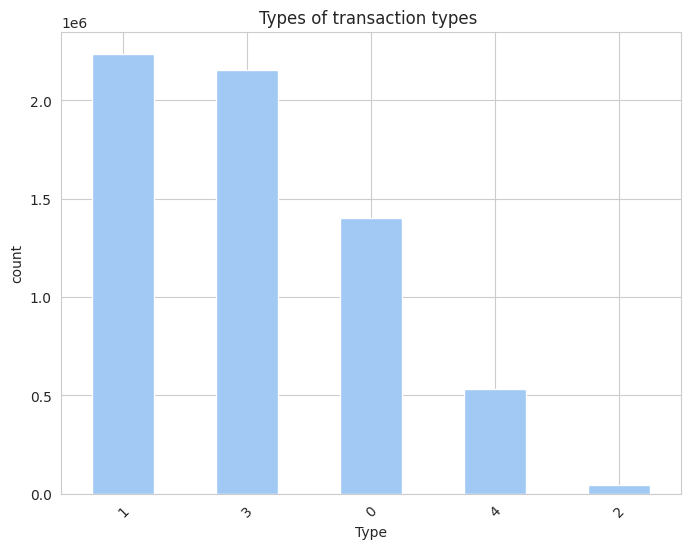

In [ ]:
sns.set_style('whitegrid') # set the style of the plot as dark grid
sns.set_palette('pastel') # set the palette of the plot as pastel
plt.figure(figsize=(8,6)) # set the size of the plot as 8 inches by 6 inches
synt_data['type'].value_counts().plot(kind='bar')
plt.title('Types of transaction types ')
plt.xticks(rotation=45)
plt.xlabel('Type')
plt.ylabel('count')
plt.show()

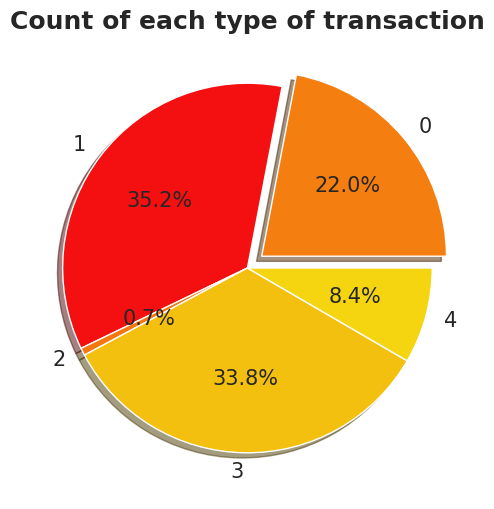

In [ ]:
synt_data.groupby('type').count()['amount']
counts = synt_data.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

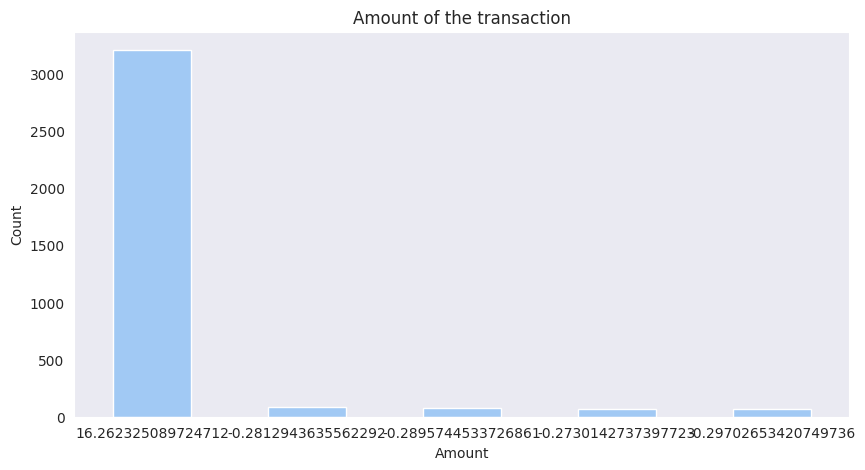

In [ ]:
# Transaction amount
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
synt_data['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title("Amount of the transaction")
plt.xticks(rotation = 0)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

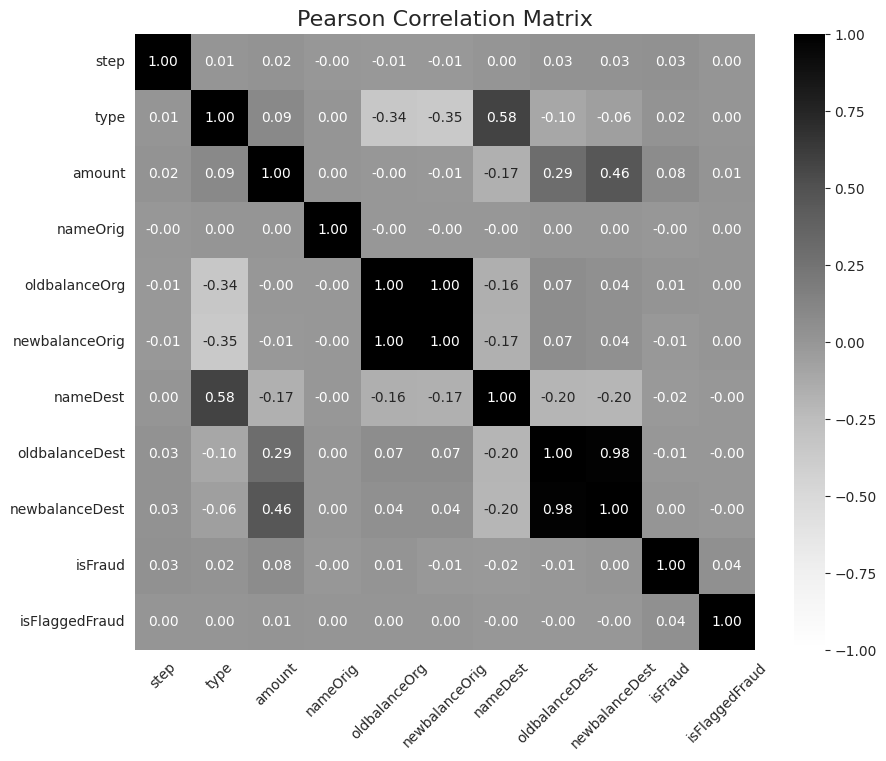

In [ ]:
# visulaising the correlation matrix
correlation = synt_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

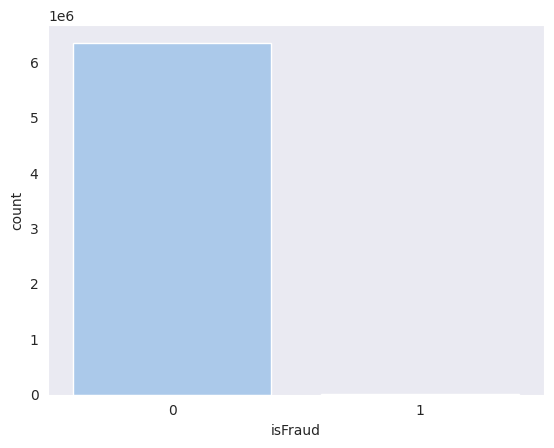

In [ ]:
sns.countplot(x='isFraud',data=synt_data)
plt.show()

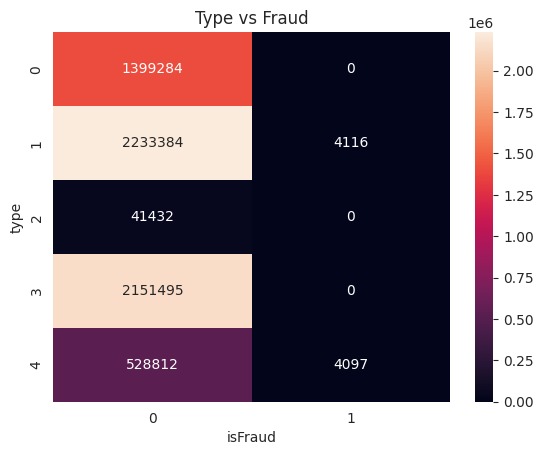

In [ ]:
plt.figure()
ct=pd.crosstab(synt_data['type'],synt_data['isFraud'])
sns.heatmap(ct,annot=True,fmt='d')
plt.title('Type vs Fraud')
plt.show()

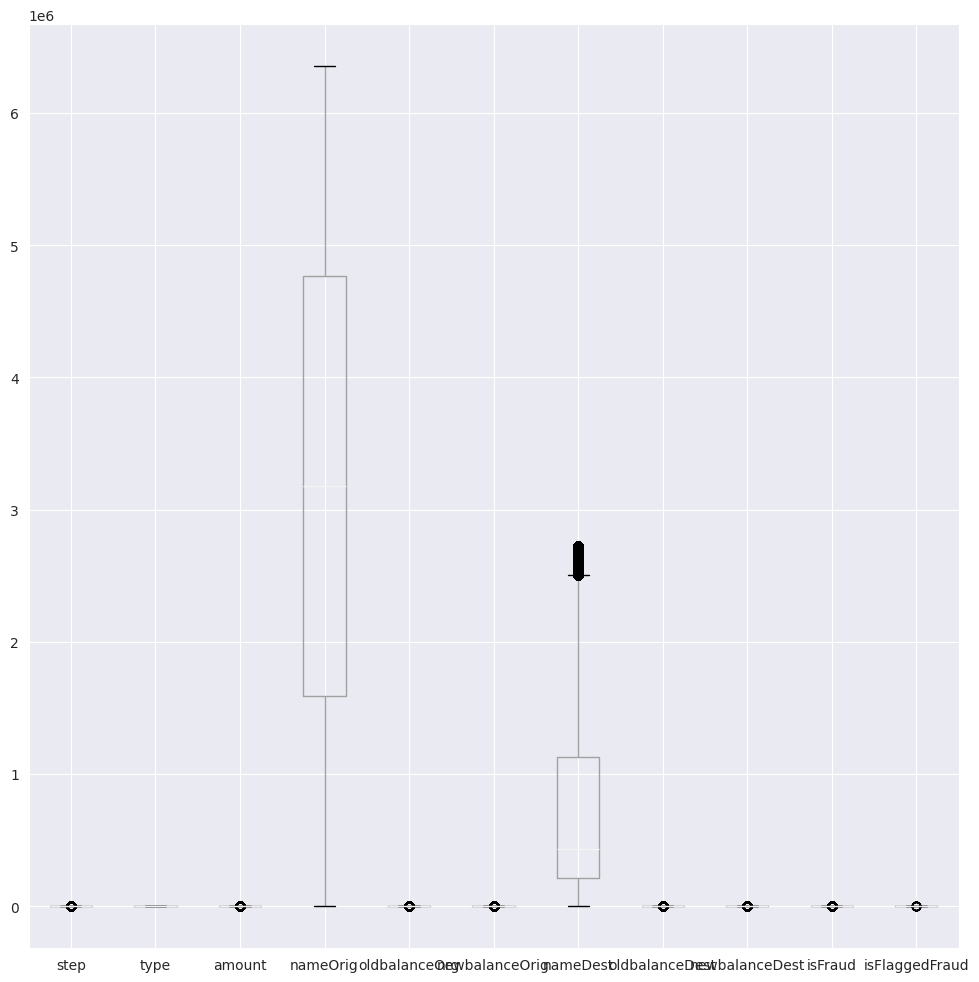

In [ ]:
synt_data.boxplot(figsize=(12,12))
plt.show()

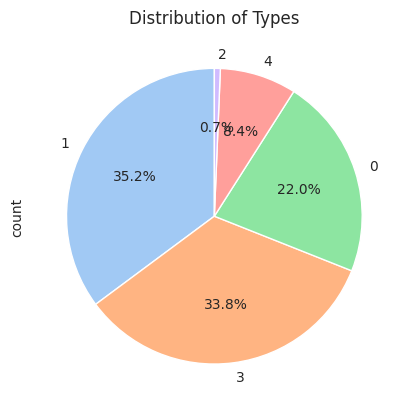

In [ ]:
synt_data['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Types')
plt.show()

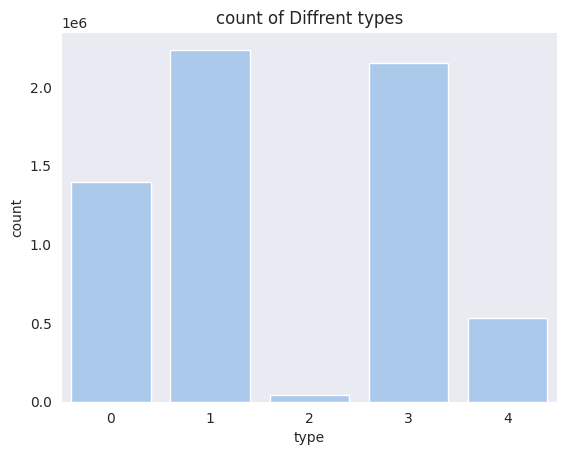

In [ ]:
sns.countplot(x='type',data=synt_data)
plt.title('count of Diffrent types')
plt.show()

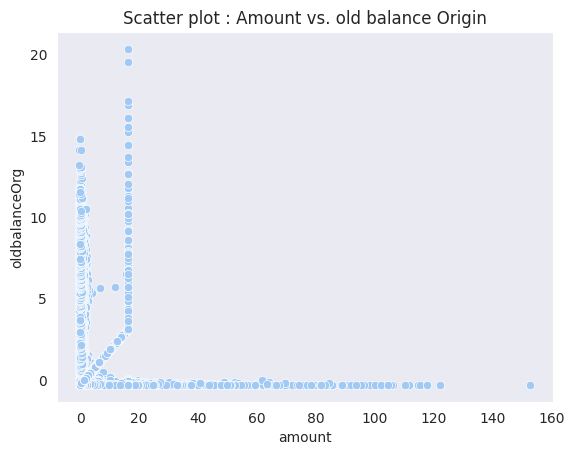

In [ ]:
sns.scatterplot(x='amount',y='oldbalanceOrg',data=synt_data)
plt.title('Scatter plot : Amount vs. old balance Origin')
plt.show()

In [ ]:
synt_data.groupby(['type','isFraud']).count()  # 0 means CASH_IN, 1 MEANS CASH_OUT, 2--DEBIT,3--PAYMENT,4--TRANSFER

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type isFraud                                                              
0    0        1399284  1399284   1399284        1399284         1399284   
1    0        2233384  2233384   2233384        2233384         2233384   
     1           4116     4116      4116           4116            4116   
2    0          41432    41432     41432          41432           41432   
3    0        2151495  2151495   2151495        2151495         2151495   
4    0         528812   528812    528812         528812          528812   
     1           4097     4097      4097           4097            4097   

              nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type isFraud                                                            
0    0         1399284         1399284         1399284         1399284  
1    0         2233384         2233384         2233384         2233384  
     1            4116            4116            4116            4116  
2    0           41432           41432           41432           41432  
3    0         2151495         2151495         2151495         2151495  
4    0          528812          528812          528812          528812  
     1            4097            4097            4097            4097

In [ ]:
X=synt_data.drop('isFraud',axis='columns')
y=synt_data['isFraud']

In [ ]:
y.value_counts()

,count
isFraud,
0,6354407
1,8213


<Axes: ylabel='count'>

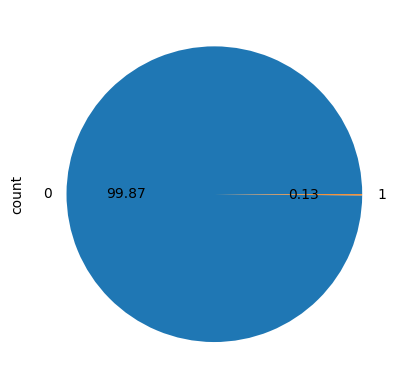

In [ ]:
y.value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4453834, 10), (1908786, 10), (4453834,), (1908786,))

# Logistic Regression

In [ ]:
# make an object of Logistic Regression
lr=LogisticRegression(max_iter=1000)

In [ ]:
# fitting the training data into lr model
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# testing the model on test data
y_pred = lr.predict(X_test)

# calculating the performance matrix

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

In [ ]:
# Precision of the logistic regression
precision_lr=precision_score(y_test, y_pred)

In [ ]:
# recall of the logistic regression
recall_lr=recall_score(y_test, y_pred)

In [ ]:
# classification report
classification_lr = classification_report(y_test, y_pred)

In [ ]:
# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 0.9987950456468142
Precision of logistic regression 0.8082191780821918
Recall of logistic regression 0.07268993839835729
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.81      0.07      0.13      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.54      0.57   1908786
weighted avg       1.00      1.00      1.00   1908786



In [ ]:
# Assuming you have a logistic regression model named 'lr'
y_probs = lr.predict_proba(X_test)[:, 1]  # Probability of positive class

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

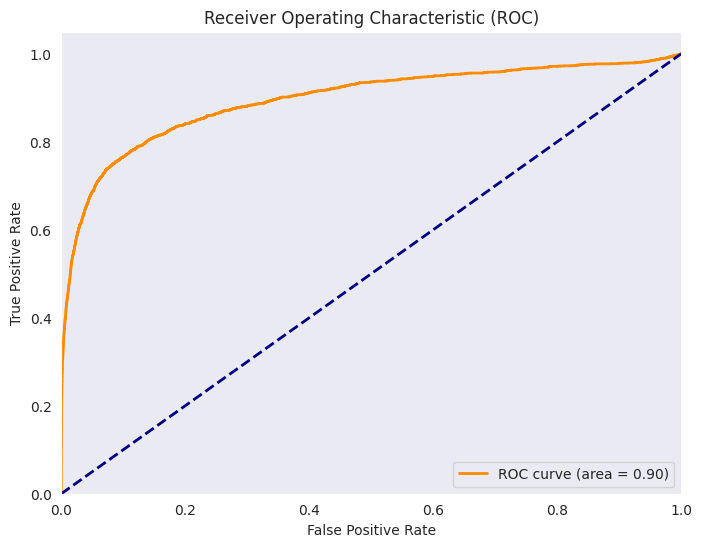

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.81      0.07      0.13      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.54      0.57   1908786
weighted avg       1.00      1.00      1.00   1908786



# Decision tree

In [ ]:
# 1. Define the Decision Tree model:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# 2. Fit the model to the training data:
dt.fit(X_train, y_train) # Assuming you have X_train and y_train

DecisionTreeClassifier(random_state=42)

In [ ]:
# 3. Make predictions on the test data:
y_pred = dt.predict(X_test) # Assuming you have X_test

In [ ]:
# 4. Evaluate the model:
accuracy = accuracy_score(y_test, y_pred) # Assuming you have y_test
classification_rep = classification_report(y_test, y_pred)


In [ ]:
# 5. Print the results:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9996746623246399
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.87      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



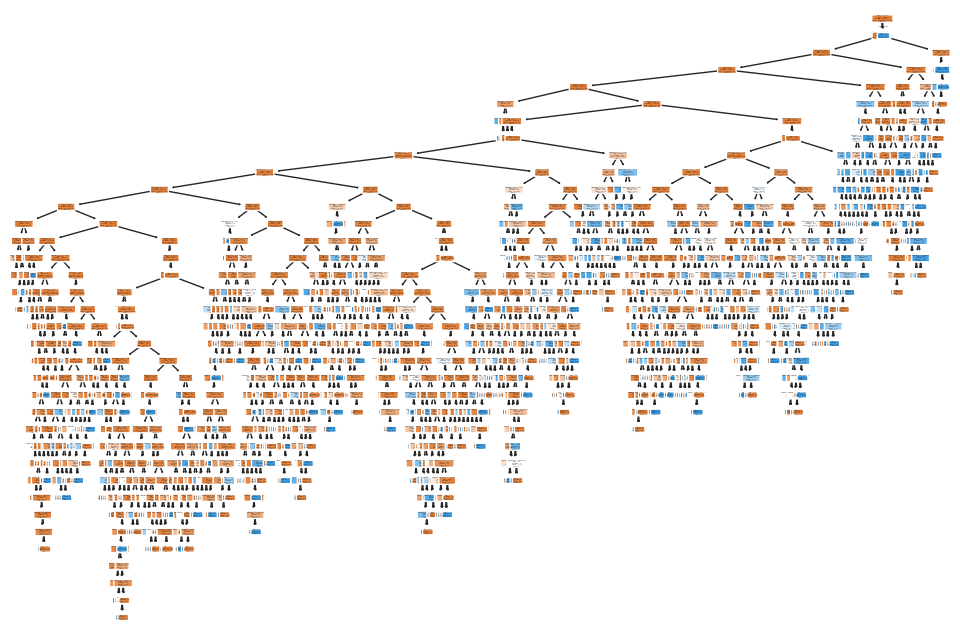

In [ ]:
# Assuming 'dt' is your trained Decision Tree model
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

#Random Forest

In [ ]:
# 1. Define the Random Forest model:
rf = RandomForestClassifier(random_state=42)  # Setting random_state for reproducibility


In [ ]:
# 2. Fit the model to the training data:
rf.fit(X_train, y_train)  # Assuming you have X_train and y_train

RandomForestClassifier(random_state=42)

In [ ]:
# 3. Make predictions on the test data:
y_pred = rf.predict(X_test)  # Assuming you have X_test


In [ ]:
# 4. Evaluate the model:
accuracy = accuracy_score(y_test, y_pred)  # Assuming you have y_test
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# 5. Print the results:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9996819968293984
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.88      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



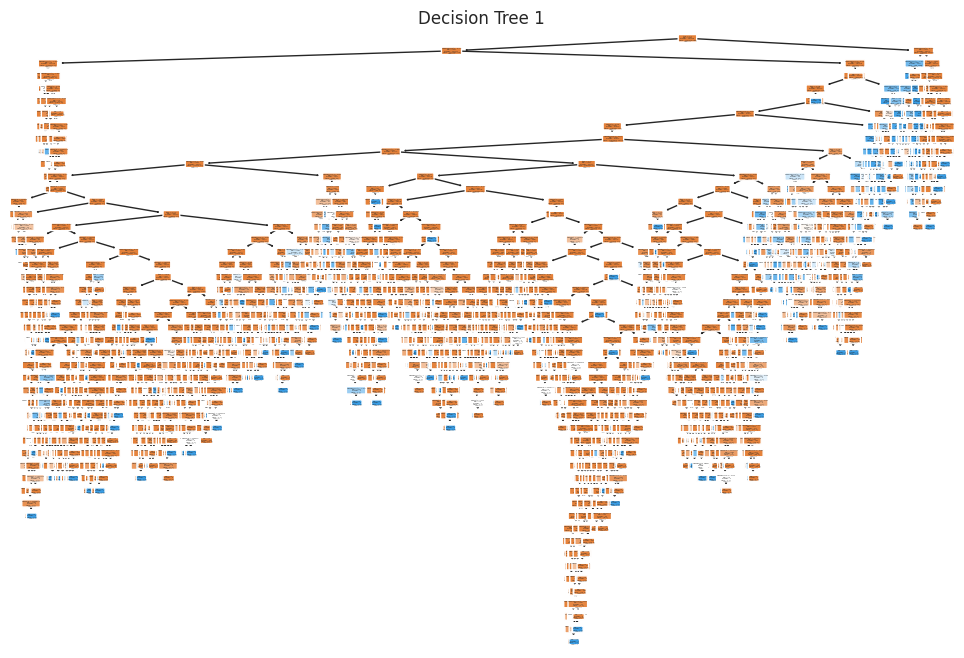

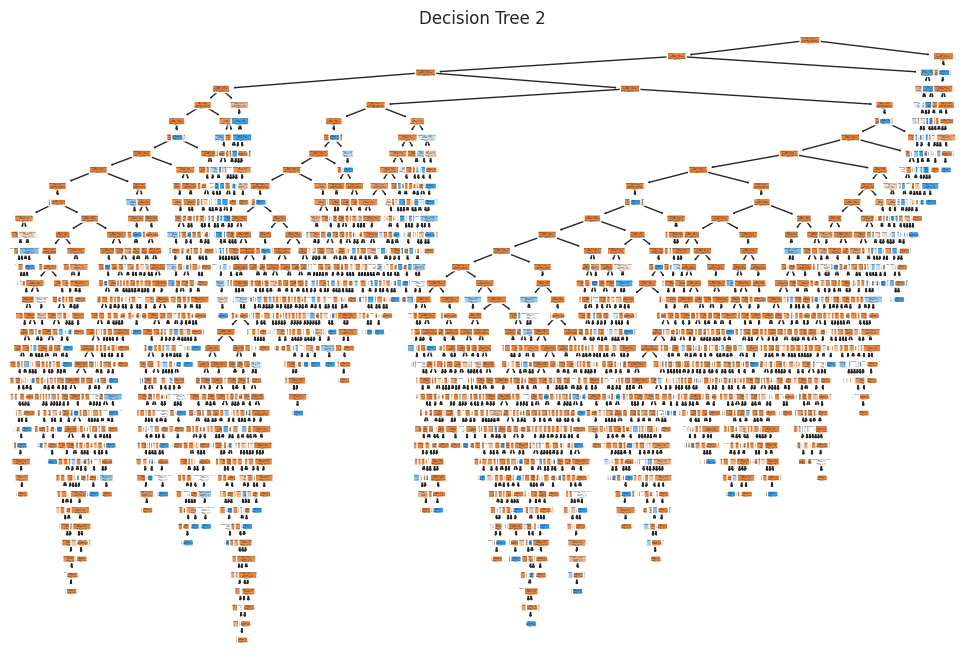

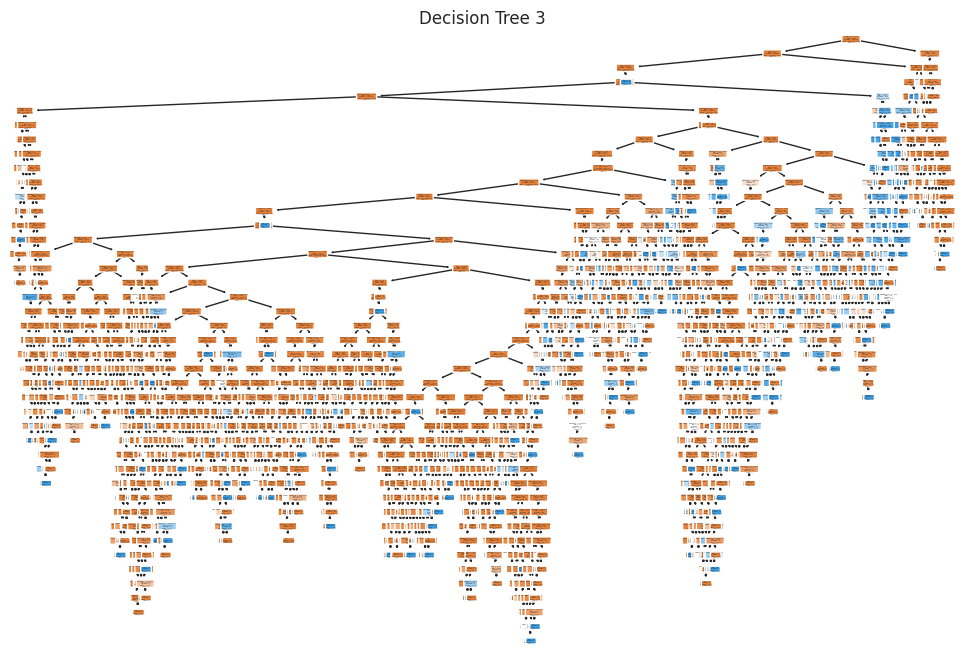

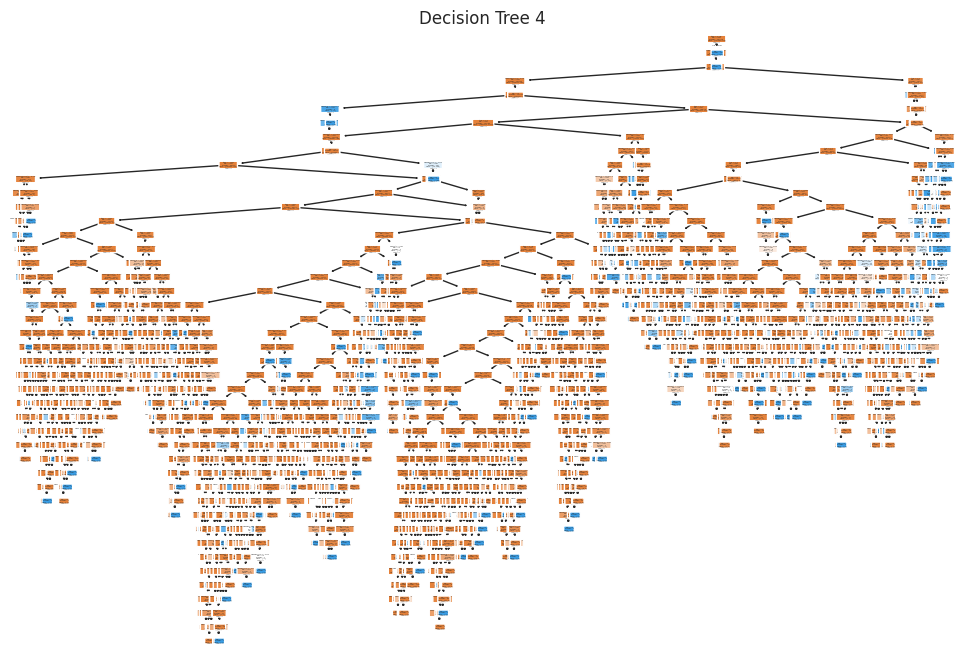

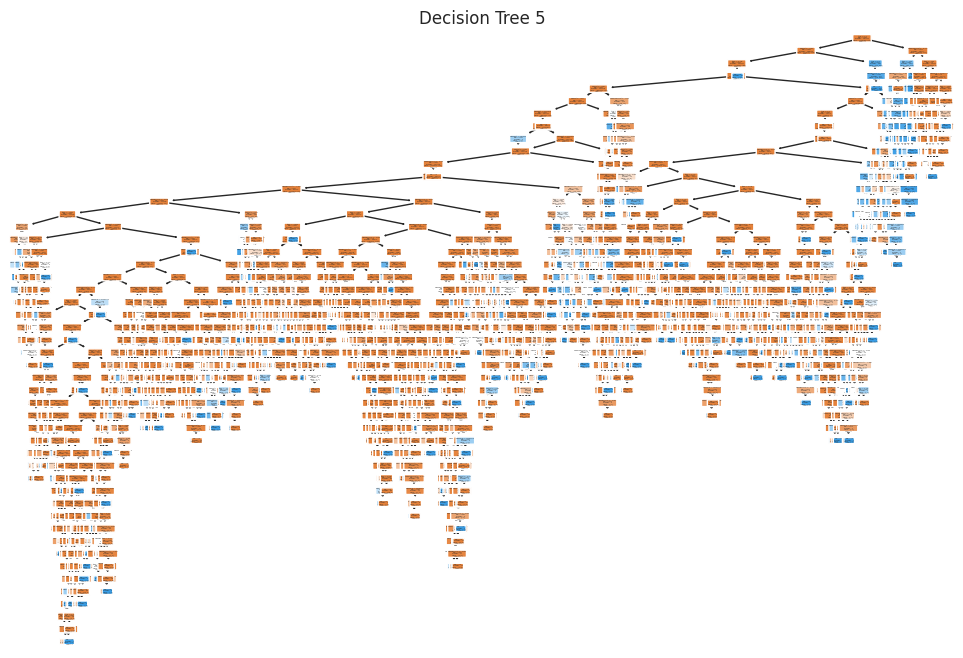

In [ ]:
# Access individual trees using rf.estimators_
for i, tree in enumerate(rf.estimators_[:5]):  # Visualize the first 5 trees (adjust as needed)
    plt.figure(figsize=(12, 8))
    plot_tree(tree, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
    plt.title(f"Decision Tree {i + 1}")
    plt.show()

#XGBClassifier

In [ ]:
# 1. Define the XGBoost model:
xgb = XGBClassifier(random_state=42)  # Setting random_state for reproducibility


In [ ]:
# 2. Fit the model to the training data:
xgb.fit(X_train, y_train)  # Assuming you have X_train and y_train


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 3. Make predictions on the test data:
y_pred = xgb.predict(X_test)  # Assuming you have X_test

In [ ]:
# 4. Evaluate the model:
accuracy = accuracy_score(y_test, y_pred)  # Assuming you have y_test
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# 5. Print the results:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9997537701973925
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.84      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.92      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



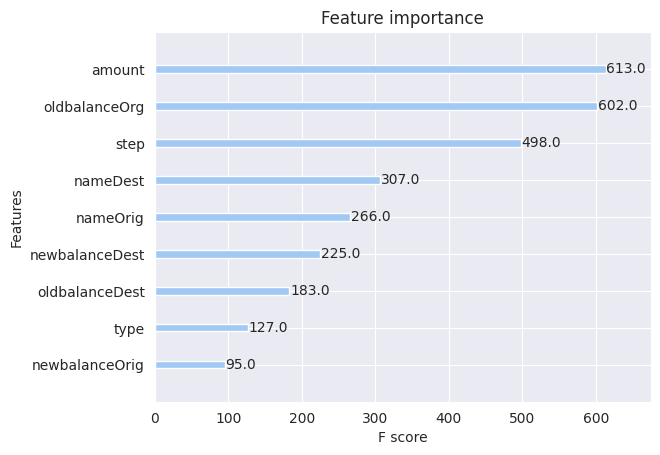

In [ ]:
# Assuming 'xgb' is your trained XGBoost model
plot_importance(xgb)
plt.show()

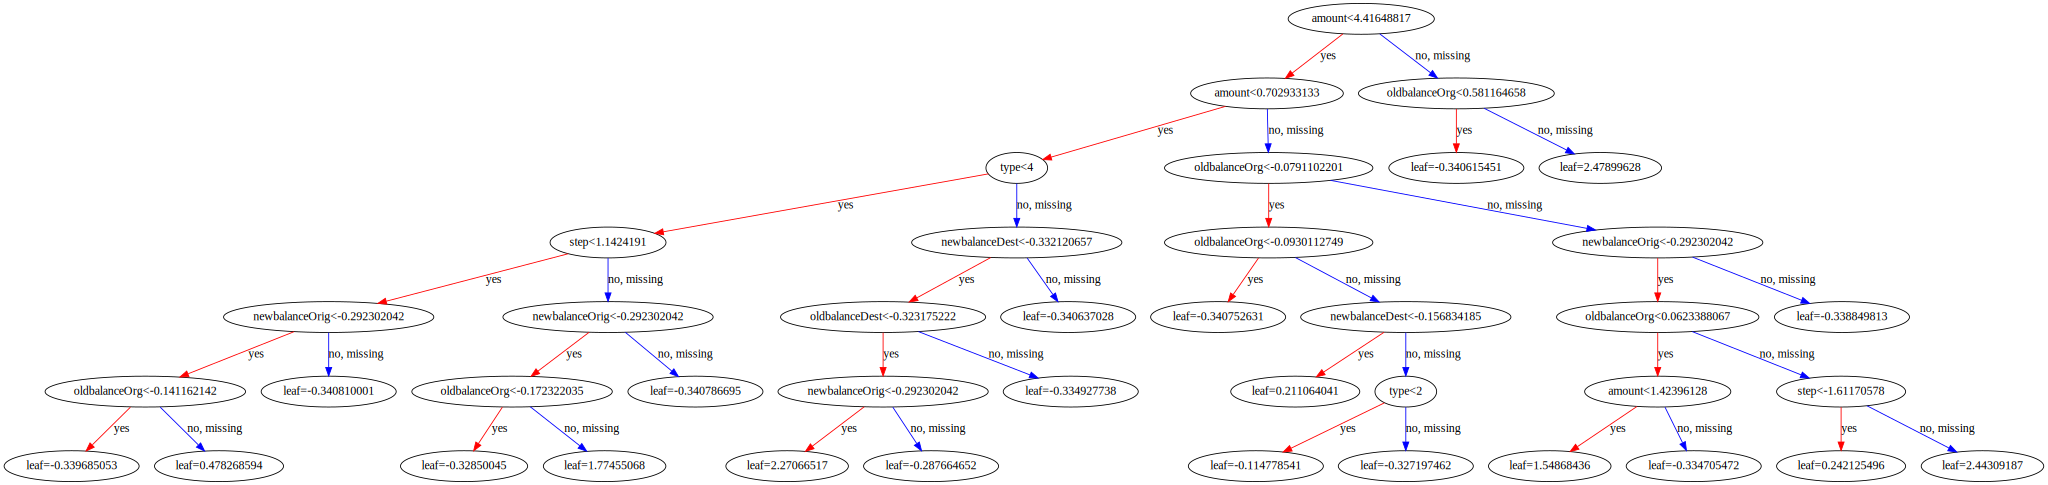

In [ ]:
# Assuming 'xgb' is your trained XGBoost model
# Visualize the first tree (adjust as needed)
to_graphviz(xgb, num_trees=0)

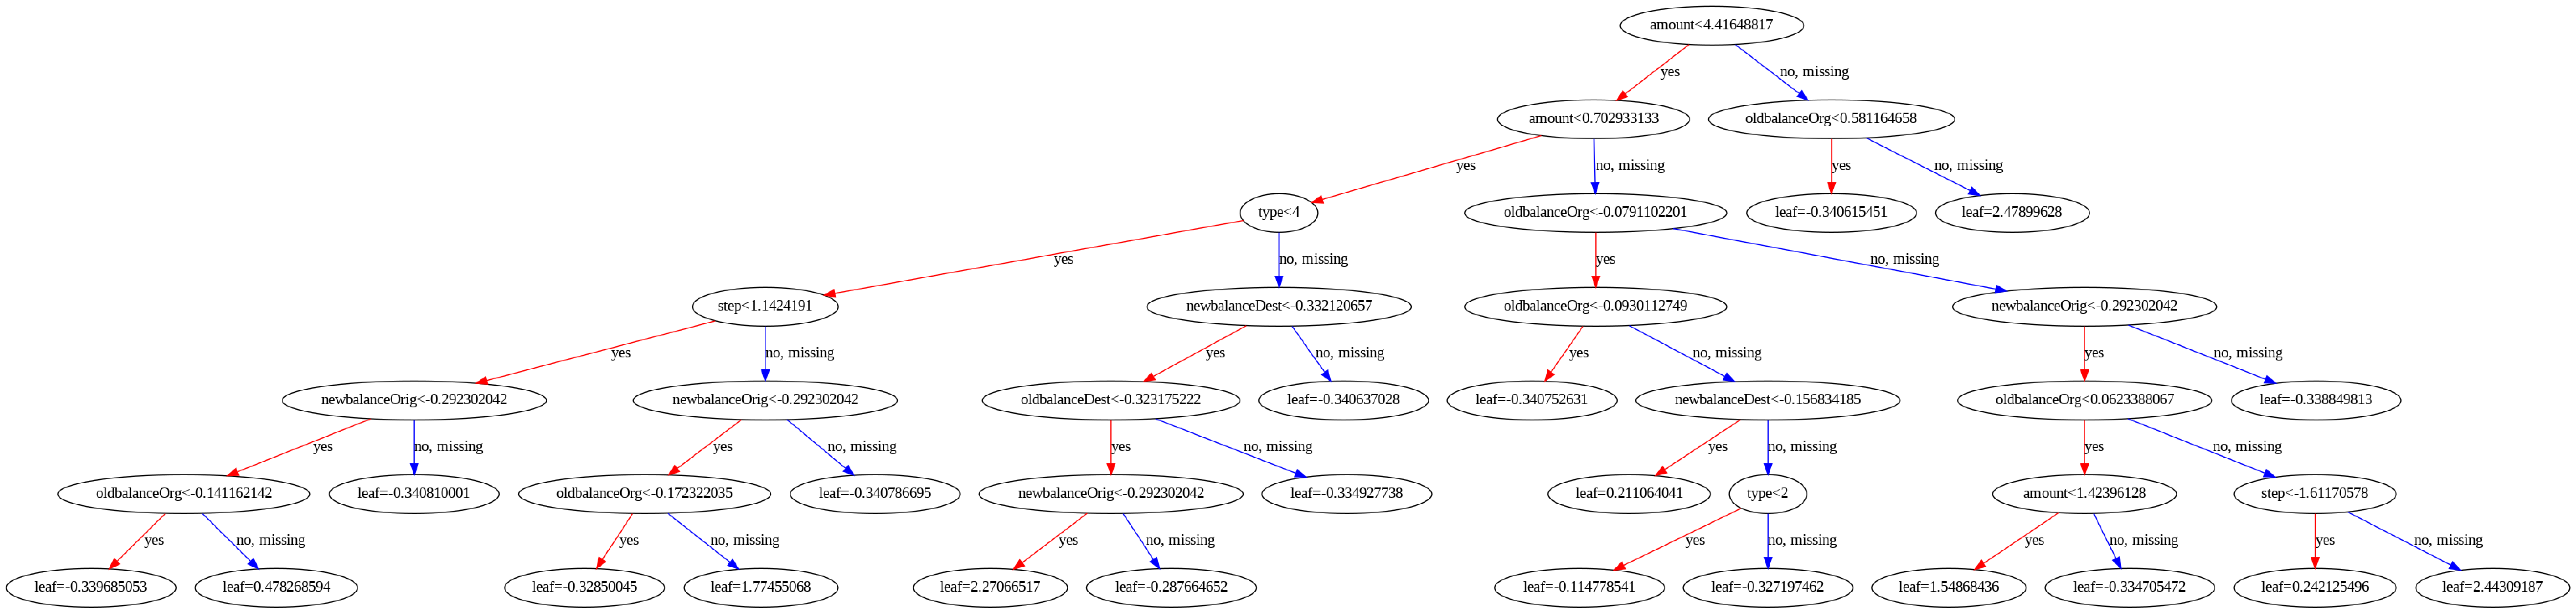

In [ ]:
# Assuming 'xgb' is your trained XGBoost model
# Plot the first tree (adjust as needed)
plot_tree(xgb, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()

# Artificial Neural Network (ANNs)

In [ ]:
# Building ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# using Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will stop
    verbose=1,  # Output messages
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored metric
)

In [ ]:
# Training ANN model with early stopping
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],  # Add the early stopping callback
    verbose=2
)

Epoch 1/20
17398/17398 - 54s - 3ms/step - accuracy: 0.9980 - loss: 178.3209 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 2/20
17398/17398 - 50s - 3ms/step - accuracy: 0.9987 - loss: 0.0704 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 3/20
17398/17398 - 51s - 3ms/step - accuracy: 0.9987 - loss: 0.0296 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 4/20
17398/17398 - 81s - 5ms/step - accuracy: 0.9987 - loss: 0.0300 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


Convolutional Neural Network (CNN)

In [ ]:
# Reshape the data
# Assuming 'X_train' and 'X_test' are your training and testing data
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train_cnn.shape[1], 1, 1)),
    MaxPooling2D(pool_size=(2, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# using Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will stop
    verbose=1,  # Output messages
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored metric
)

In [ ]:
# Training ANN model with early stopping
history = cnn_model.fit(
    X_train_cnn,
    y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop],  # Add the early stopping callback
    verbose=2
)

Epoch 1/20
17398/17398 - 79s - 5ms/step - accuracy: 0.9973 - loss: 14.4503 - val_accuracy: 0.9958 - val_loss: 0.0175
Epoch 2/20
17398/17398 - 81s - 5ms/step - accuracy: 0.9986 - loss: 0.0287 - val_accuracy: 0.9989 - val_loss: 0.0066
Epoch 3/20
17398/17398 - 73s - 4ms/step - accuracy: 0.9987 - loss: 0.0777 - val_accuracy: 0.9990 - val_loss: 0.0072
Epoch 4/20
17398/17398 - 81s - 5ms/step - accuracy: 0.9989 - loss: 0.0292 - val_accuracy: 0.9991 - val_loss: 0.0053
Epoch 5/20
17398/17398 - 83s - 5ms/step - accuracy: 0.9988 - loss: 0.0940 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 6/20
17398/17398 - 74s - 4ms/step - accuracy: 0.9992 - loss: 0.0137 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 7/20
17398/17398 - 91s - 5ms/step - accuracy: 0.9990 - loss: 0.3252 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 8/20
17398/17398 - 144s - 8ms/step - accuracy: 0.9991 - loss: 0.1071 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 9/20
17398/17398 - 136s - 8ms/step - accuracy: 0.9991 - loss: 0.

In [ ]:
# Evaluate the model
_, accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9993445873260498


# Long short-term memory (LSTM)

In [ ]:
# Reshape the input data for LSTM
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# using Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,  # Number of epochs with no improvement after which training will stop
    verbose=1,  # Output messages
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored metric
)

In [ ]:
# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 461s 3ms/step - accuracy: 0.9976 - loss: 33.5794 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 2/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 453s 3ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 3/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 459s 3ms/step - accuracy: 0.9987 - loss: 0.0101 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 4/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 533s 4ms/step - accuracy: 0.9987 - loss: 0.0098 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 5/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 562s 4ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 6/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 549s 4ms/step - accuracy: 0.9987 - loss: 0.0097 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 7/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 498s 3ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.9987 - val_loss: 0.0098
Epoch 8/10
139183/139183 ━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
# Evaluate the model
_, accuracy = lstm_model.evaluate(X_test_lstm, y_test, verbose=0)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9987243413925171
